In [129]:
import os
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np

image_files = os.listdir('images')
uploaded = ['images/'+i for i in image_files]
uploaded

['images/3.jpg',
 'images/360_F_245563558_XH9Pe5LJI2kr7VQuzQKAjAbz9PAyejG1.jpg',
 'images/c573e9df37d0c494c66abc571d35f27c.png',
 'images/front-view-of-man-s-face.jpg',
 'images/istockphoto-1278139568-170667a.jpg',
 'images/leo.jpg',
 'images/man.jpg',
 'images/photo-1597223557154-721c1cecc4b0.jfif',
 'images/photo_2023-02-24_01-57-09.jpg',
 'images/woman.jpg']

In [130]:
class Point:
    def __init__(self, x, y):
        """
        a point in euclidean distance graph
        """
        self.x = x
        self.y = y
    
    def euclidean_distance(self, point):
        """
        calculate euclidean distance between 2 points
        """
        return ((self.y - point.y)**2 + (self.x - point.x)**2) ** 1/2
    
    def get(self, replace_x=None):
        """
        get euclidean coordinates (x, y) as a tuple
        
        if replace_x has a value, replace the x coordinate with that
        """
        
        if replace_x:
            return (replace_x, self.y)
        else:
            return (self.x, self.y)
    
    
    def get_point(self, replace_x=None):
        """
        get euclidean coordinates (x, y) as a tuple
        
        if replace_x has a value, replace the x coordinate with that
        """
        if replace_x:
            return Point(replace_x, self.y)
        else:
            return Point(self.x, self.y)
        
        
    def __str__(self):
        return f"x: {self.x}\ny: {self.y}"
    
    @staticmethod
    def np_array_to_Point(np_array):
        return Point(np_array[0], np_array[1])
    
    @staticmethod
    def tuple_distance(tuple1, tuple2):
        """
        euclidean distance between 2 tuples which are of the form (x,y)
        """
        point_1 = Point(tuple1[0], tuple1[1])
        point_2 = Point(tuple2[0], tuple2[1])
        
        return point_1.euclidean_distance(point_2)
    
class Line:
    def __init__(self, point_1, point_2):
        """
        a line in euclidean distance graph
        The equation for the line in the form of y = mx + c is calculated
        takes as input 2 point objects and finds the straight line that connects them
        """
        self.m = (point_1.y - point_2.y) / (point_1.x - point_2.x) # gradient
        self.c = point_1.y - (self.m * point_1.x) # y intersect
    
    def intersection(self, line):
        """
        find where this line intersects with another line
        calculation from: https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/
        returns: Point object
        """
        A = np.array([[1, -self.m],
                      [1, -line.m]])
        
        b = np.array([self.c, line.c])
        solution = np.linalg.solve(A, b)

        y = solution[0]
        x = solution[1]
        
        return Point(x, y)
    
    
    def solve(self, x):
        """
        find the y value when x is a certain value
        """
        return int( self.m*x + self.c )
    
    def __str__(self):
        return f"y = {self.m}x + {self.c}"

In [131]:
def grid_15(annotated_image, results):
    face = results.multi_face_landmarks[0]
    shape = image.shape

    coordinates = []
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])

        coordinates.append([relative_x, relative_y])

    cooridnates = np.array(coordinates)
    
    
    
    left_eyebrow_top =  Point.np_array_to_Point( coordinates[105] )
    right_eyebrow_top =  Point.np_array_to_Point( coordinates[334] )

    left_eye_top =  Point.np_array_to_Point( coordinates[159] )
    right_eye_top =  Point.np_array_to_Point( coordinates[386] )

    left_eyebrow_edge =  Point.np_array_to_Point( coordinates[156] )
    right_eyebrow_edge =  Point.np_array_to_Point( coordinates[300] )

    left_eye_bottom =  Point.np_array_to_Point( coordinates[145] )
    right_eye_bottom =  Point.np_array_to_Point( coordinates[374] )    
    

    # top line
    cv2.line(annotated_image, left_eyebrow_top.get(left_eyebrow_edge.x), right_eyebrow_top.get(right_eyebrow_edge.x),(255,0,0),2)
    top_line = Line(left_eyebrow_top, right_eyebrow_top)

    # middle line
    cv2.line(annotated_image, left_eye_top.get(left_eyebrow_edge.x), right_eye_top.get(right_eyebrow_edge.x),(255,0,0),2)
    middle_line = Line(left_eye_top, right_eye_top)

    # bottom line
    cv2.line(annotated_image, left_eye_bottom.get(left_eyebrow_edge.x), right_eye_bottom.get(right_eyebrow_edge.x),(255,0,0),2)
    bottom_line = Line(left_eye_bottom, right_eye_bottom)

    # top left point
    top_left_point = (left_eyebrow_edge.x, top_line.solve(left_eyebrow_edge.x))

    # top right point
    top_right_point = (right_eyebrow_edge.x, top_line.solve(right_eyebrow_edge.x))

    # middle left point
    middle_left_point = (left_eyebrow_edge.x, middle_line.solve(left_eyebrow_edge.x))

    # middle right point
    middle_right_point = (right_eyebrow_edge.x, middle_line.solve(right_eyebrow_edge.x))

    # bottom left point
    bottom_left_point = (left_eyebrow_edge.x, bottom_line.solve(left_eyebrow_edge.x))

    # bottom right point
    bottom_right_point = (right_eyebrow_edge.x, bottom_line.solve(right_eyebrow_edge.x))

    # left horizontal line
    cv2.line(annotated_image, top_left_point, bottom_left_point,(255,0,0),2)

    # right horizontal line
    cv2.line(annotated_image, top_right_point, bottom_right_point,(255,0,0),2)

    # points
    cv2.circle(annotated_image, top_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, top_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_right_point, radius=1, color=(0, 0, 255), thickness=3)
    
    
    print("top", top_right_point, "middle", middle_right_point, "bottom", bottom_right_point)
    top_distance = middle_right_point[1] - top_right_point[1]
    bottom_distance = bottom_right_point[1] - middle_right_point[1]
    print("ratio:", top_distance/bottom_distance)
    
    # add text of ratio
    text_y = ((top_right_point[1] + middle_right_point[1]) / 2)
    
    cv2.putText(img=annotated_image, text=str(top_distance/bottom_distance), org=(top_right_point[0], int(text_y)), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 173),thickness=2)
    
    return annotated_image

In [132]:
def grid_11(annotated_image, results):
    face = results.multi_face_landmarks[0]
    shape = image.shape

    coordinates = []
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])

        coordinates.append([relative_x, relative_y])

    cooridnates = np.array(coordinates)
    
    
    
    left_eyebrow_top =  Point.np_array_to_Point( coordinates[105] )
    right_eyebrow_top =  Point.np_array_to_Point( coordinates[334] )

    left_lip_top =  Point.np_array_to_Point( coordinates[37] )
    right_lip_top =  Point.np_array_to_Point( coordinates[267] )

    left_eyebrow_edge =  Point.np_array_to_Point( coordinates[156] )
    right_eyebrow_edge =  Point.np_array_to_Point( coordinates[300] )

    bottom_chin =  Point.np_array_to_Point( coordinates[152] )
    

    # top line
    cv2.line(annotated_image, left_eyebrow_top.get(left_eyebrow_edge.x), right_eyebrow_top.get(right_eyebrow_edge.x),(255,0,0),2)
    top_line = Line(left_eyebrow_top, right_eyebrow_top)

    # middle line
    middle_line = Line(left_lip_top, right_lip_top)
    cv2.line(annotated_image, (left_eyebrow_edge.x, middle_line.solve(left_eyebrow_edge.x)), (right_eyebrow_edge.x, middle_line.solve(right_eyebrow_edge.x)),(255,0,0),2)
    
    # bottom line
    cv2.line(annotated_image, bottom_chin.get(left_eyebrow_edge.x), bottom_chin.get(right_eyebrow_edge.x),(255,0,0),2)
    bottom_line = Line(bottom_chin.get_point(left_eyebrow_edge.x), bottom_chin.get_point(right_eyebrow_edge.x))

    
#     # top left point
    top_left_point = (left_eyebrow_edge.x, top_line.solve(left_eyebrow_edge.x))

#     # top right point
    top_right_point = (right_eyebrow_edge.x, top_line.solve(right_eyebrow_edge.x))

#     # middle left point
    middle_left_point = (left_eyebrow_edge.x, middle_line.solve(left_eyebrow_edge.x))

#     # middle right point
    middle_right_point = (right_eyebrow_edge.x, middle_line.solve(right_eyebrow_edge.x))

#     # bottom left point
    bottom_left_point = (left_eyebrow_edge.x, bottom_line.solve(left_eyebrow_edge.x))

#     # bottom right point
    bottom_right_point = (right_eyebrow_edge.x, bottom_line.solve(right_eyebrow_edge.x))

#     # left horizontal line
    cv2.line(annotated_image, top_left_point, bottom_left_point,(255,0,0),2)

#     # right horizontal line
    cv2.line(annotated_image, top_right_point, bottom_right_point,(255,0,0),2)

#     # points
    cv2.circle(annotated_image, top_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, top_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_right_point, radius=1, color=(0, 0, 255), thickness=3)
    
    
#     print("top", top_right_point, "middle", middle_right_point, "bottom", bottom_right_point)
    top_distance = middle_right_point[1] - top_right_point[1]
    bottom_distance = bottom_right_point[1] - middle_right_point[1]
    print("ratio:", top_distance/bottom_distance)
    
#     # add text of ratio
    text_y = ((top_right_point[1] + middle_right_point[1]) / 2)
    
    cv2.putText(img=annotated_image, text=str(top_distance/bottom_distance), org=(top_right_point[0], int(text_y)), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 173),thickness=2)
    
    return annotated_image

In [133]:
def grid_4(annotated_image, results):
    # bottom of nose == 2
    # left of lips == 61
    # right of lips == 291
    # bottom of lips = 17
    
    face = results.multi_face_landmarks[0]
    shape = image.shape

    coordinates = []
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y

        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])

        coordinates.append([relative_x, relative_y])

    cooridnates = np.array(coordinates)
    
    bottom_nose = Point.np_array_to_Point( coordinates[2] )
    
    lip_left_edge = Point.np_array_to_Point( coordinates[61] )
    lip_right_edge = Point.np_array_to_Point( coordinates[291] )
    
    left_lip_top =  Point.np_array_to_Point( coordinates[37] )
    right_lip_top =  Point.np_array_to_Point( coordinates[267] )
    
    bottom_lip =  Point.np_array_to_Point( coordinates[17] )
    

    # top line
    cv2.line(annotated_image, bottom_nose.get(lip_left_edge.x), bottom_nose.get(lip_right_edge.x),(255,0,0),2)
    top_line = Line(bottom_nose.get_point(lip_left_edge.x), bottom_nose.get_point(lip_right_edge.x))

    # middle line
    middle_line = Line(left_lip_top, right_lip_top)
    cv2.line(annotated_image, (lip_left_edge.x, middle_line.solve(lip_left_edge.x)), (lip_right_edge.x, middle_line.solve(lip_right_edge.x)),(255,0,0),2)
    
    # bottom line
    cv2.line(annotated_image, bottom_lip.get(lip_left_edge.x), bottom_lip.get(lip_right_edge.x),(255,0,0),2)
    bottom_line = Line(bottom_lip.get_point(lip_left_edge.x), bottom_lip.get_point(lip_right_edge.x))

    
    # top left point
    top_left_point = (lip_left_edge.x, top_line.solve(lip_left_edge.x))

    # top right point
    top_right_point = (lip_right_edge.x, top_line.solve(lip_right_edge.x))

    # middle left point
    middle_left_point = (lip_left_edge.x, middle_line.solve(lip_left_edge.x))

    # middle right point
    middle_right_point = (lip_right_edge.x, middle_line.solve(lip_right_edge.x))

    # bottom left point
    bottom_left_point = (lip_left_edge.x, bottom_line.solve(lip_left_edge.x))

    # bottom right point
    bottom_right_point = (lip_right_edge.x, bottom_line.solve(lip_right_edge.x))

    # left horizontal line
    cv2.line(annotated_image, top_left_point, bottom_left_point,(255,0,0),2)

    # right horizontal line
    cv2.line(annotated_image, top_right_point, bottom_right_point,(255,0,0),2)

# #     # points
    cv2.circle(annotated_image, top_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, top_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, middle_right_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_left_point, radius=1, color=(0, 0, 255), thickness=3)
    cv2.circle(annotated_image, bottom_right_point, radius=1, color=(0, 0, 255), thickness=3)
    
    
#     print("top", top_right_point, "middle", middle_right_point, "bottom", bottom_right_point)
    top_distance = middle_right_point[1] - top_right_point[1]
    bottom_distance = bottom_right_point[1] - middle_right_point[1]
    print("ratio:", bottom_distance/top_distance)
    
#     # add text of ratio
    text_y = ((middle_right_point[1] + bottom_right_point[1]) / 2)
    
    cv2.putText(img=annotated_image, text=str(bottom_distance/top_distance), org=(top_right_point[0], int(text_y)), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 173),thickness=2)
    
    return annotated_image

In [134]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.axis('off')
  plt.imshow(RGB_im)
#   plt.title('my picture')
  plt.show()

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded}
# Preview the images.
for name, image in images.items():
#   print(name)   
#   resize_and_show(image)
  pass

In [135]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

# help(mp_face_mesh.FaceMesh)

In [136]:
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

Face landmarks of images/3.jpg:
ratio: 1.8055555555555556


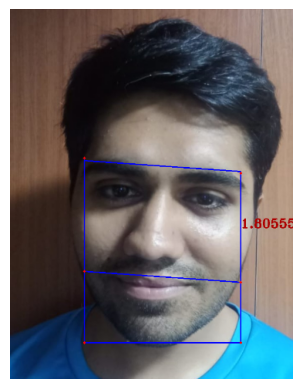

Face landmarks of images/360_F_245563558_XH9Pe5LJI2kr7VQuzQKAjAbz9PAyejG1.jpg:
ratio: 1.2950819672131149


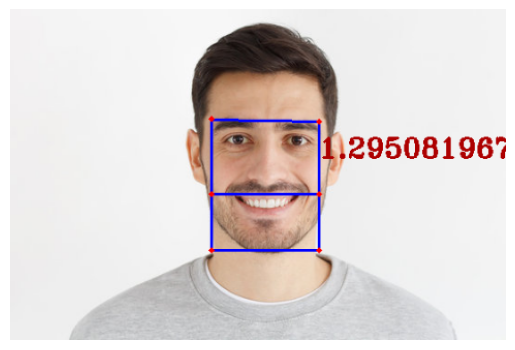

Face landmarks of images/c573e9df37d0c494c66abc571d35f27c.png:
ratio: 1.7527272727272727


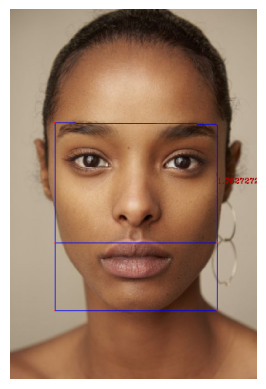

Face landmarks of images/front-view-of-man-s-face.jpg:
ratio: 1.5938864628820961


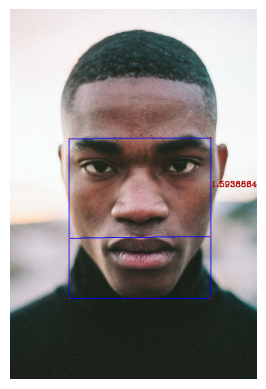

Face landmarks of images/istockphoto-1278139568-170667a.jpg:
ratio: 1.5208333333333333


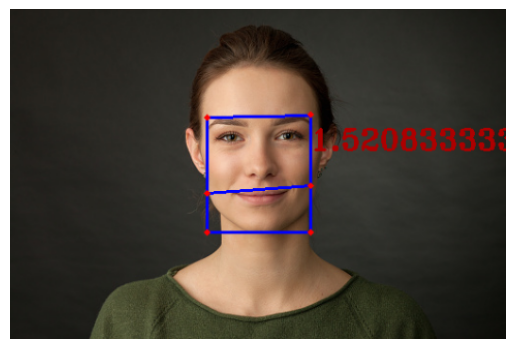

Face landmarks of images/leo.jpg:
ratio: 1.824390243902439


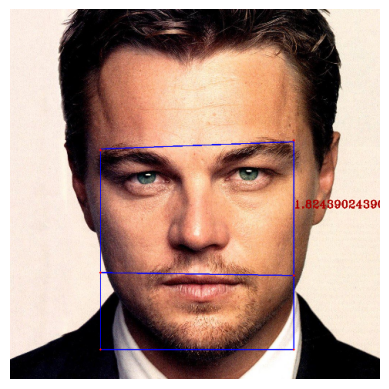

Face landmarks of images/man.jpg:
ratio: 1.6510416666666667


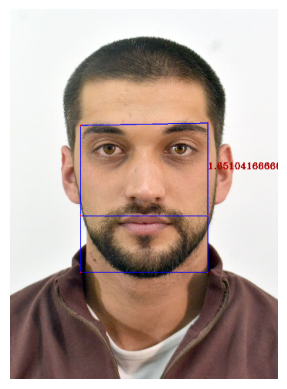

Face landmarks of images/photo-1597223557154-721c1cecc4b0.jfif:
ratio: 1.86096256684492


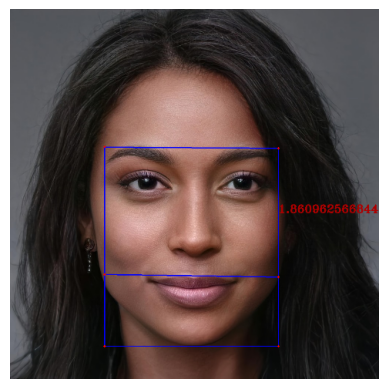

Face landmarks of images/photo_2023-02-24_01-57-09.jpg:
ratio: 1.6266666666666667


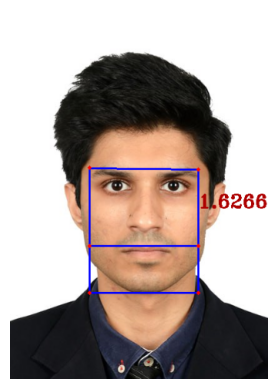

Face landmarks of images/woman.jpg:
ratio: 1.6637931034482758


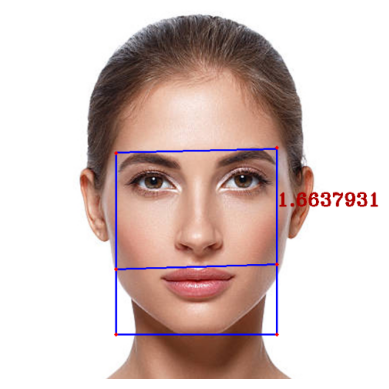

In [137]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
#     annotated_image = grid_15(annotated_image, results)
    annotated_image = grid_11(annotated_image, results)
#     annotated_image = grid_4(annotated_image, results)
    
    
    resize_and_show(annotated_image)

ratio: 1.6637931034482758


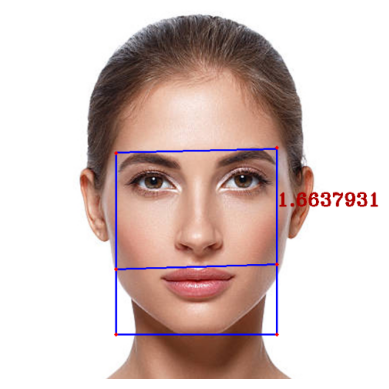

In [69]:
annotated_image = image.copy()
annotated_image = grid_11(annotated_image, results)


resize_and_show(annotated_image)

ratio: 1.6637931034482758


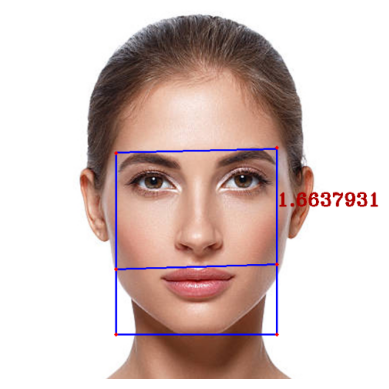

In [140]:
import coordinates
import grids

annotated_image = grids.grid_11(image, results)
resize_and_show(annotated_image)

## Facial grid 15

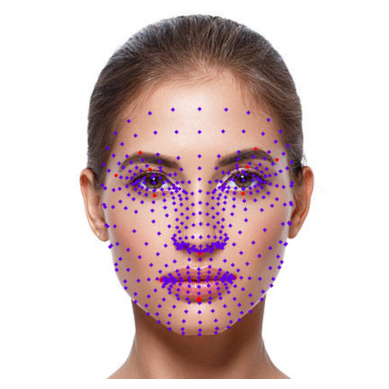

In [87]:
annotated_image = image.copy()
# cv2.line(annotated_image,(385,305),(239,308),(255,0,0),2) # below eye
# cv2.line(annotated_image,(215,237),(406,231),(255,0,0),2) # top eyebrow
# cv2.line(annotated_image,(231,265),(392,261),(255,0,0),2) # bottom eye

interest_points = [105, 334, 27, 257, 156, 300, 23, 253]

counter = 0
for face in results.multi_face_landmarks:
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y

        shape = image.shape 
        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])

        cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(225, 0, 100), thickness=3)
        
        # 105 top of left eyebrow
        # 334 top of right eyebrow
        
        # 27 top of left eye
        # 257 top of right eye
        
        # 156 left edge of eyebrow
        # 300 right edge of eyebrow
        
        # 23 bottom of left eye
        # 253 bottom of right eye
        
#         if counter == 156:
#             cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3)
#             print(27, str(relative_x) + ',' + str(relative_y))
            
#         if counter == 300:
#             cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3)
#             print(str(relative_x) + ',' + str(relative_y))
        
        if counter in interest_points:
            cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3)
        
        if counter==2:
            cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=5)
        
        if counter==17:
            cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=5)
            
        if counter==61:
            cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=5)
            
        if counter==291:
            cv2.circle(annotated_image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=5)
        
        counter += 1


resize_and_show(annotated_image)

In [56]:
face = results.multi_face_landmarks[0]
shape = image.shape

coordinates = []
for landmark in face.landmark:
    x = landmark.x
    y = landmark.y
    
    relative_x = int(x * shape[1])
    relative_y = int(y * shape[0])
    
    coordinates.append([relative_x, relative_y])

cooridnates = np.array(coordinates)

In [57]:
left_eyebrow_top =  Point.np_array_to_Point( coordinates[105] )
right_eyebrow_top =  Point.np_array_to_Point( coordinates[334] )

left_eye_top =  Point.np_array_to_Point( coordinates[27] )
right_eye_top =  Point.np_array_to_Point( coordinates[257] )

left_eyebrow_edge =  Point.np_array_to_Point( coordinates[156] )
right_eyebrow_edge =  Point.np_array_to_Point( coordinates[300] )

left_eye_bottom =  Point.np_array_to_Point( coordinates[23] )
right_eye_bottom =  Point.np_array_to_Point( coordinates[253] )

In [37]:
print(left_eyebrow_edge)

x: 175
y: 275


In [38]:
left_eyebrow_top.get()

(215, 237)

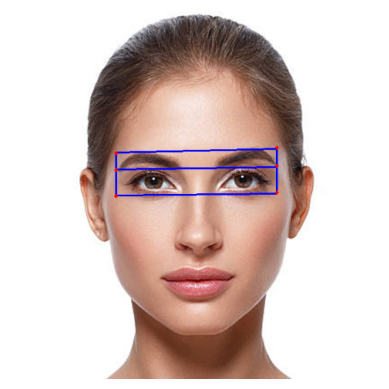

In [66]:
annotated_image = image.copy()

# top line
cv2.line(annotated_image, left_eyebrow_top.get(left_eyebrow_edge.x), right_eyebrow_top.get(right_eyebrow_edge.x),(255,0,0),2)
top_line = Line(left_eyebrow_top, right_eyebrow_top)

# middle line
cv2.line(annotated_image, left_eye_top.get(left_eyebrow_edge.x), right_eye_top.get(right_eyebrow_edge.x),(255,0,0),2)
middle_line = Line(left_eye_top, right_eye_top)

# bottom line
cv2.line(annotated_image, left_eye_bottom.get(left_eyebrow_edge.x), right_eye_bottom.get(right_eyebrow_edge.x),(255,0,0),2)
bottom_line = Line(left_eye_bottom, right_eye_bottom)

# top left point
top_left_point = (left_eyebrow_edge.x, top_line.solve(left_eyebrow_edge.x))

# top right point
top_right_point = (right_eyebrow_edge.x, top_line.solve(right_eyebrow_edge.x))

# middle left point
middle_left_point = (left_eyebrow_edge.x, middle_line.solve(left_eyebrow_edge.x))

# middle right point
middle_right_point = (right_eyebrow_edge.x, middle_line.solve(right_eyebrow_edge.x))

# bottom left point
bottom_left_point = (left_eyebrow_edge.x, bottom_line.solve(left_eyebrow_edge.x))

# bottom right point
bottom_right_point = (right_eyebrow_edge.x, bottom_line.solve(right_eyebrow_edge.x))

# left horizontal line
cv2.line(annotated_image, top_left_point, bottom_left_point,(255,0,0),2)

# right horizontal line
cv2.line(annotated_image, top_right_point, bottom_right_point,(255,0,0),2)

# points
cv2.circle(annotated_image, top_left_point, radius=1, color=(0, 0, 255), thickness=3)
cv2.circle(annotated_image, top_right_point, radius=1, color=(0, 0, 255), thickness=3)
cv2.circle(annotated_image, middle_left_point, radius=1, color=(0, 0, 255), thickness=3)
cv2.circle(annotated_image, middle_right_point, radius=1, color=(0, 0, 255), thickness=3)
cv2.circle(annotated_image, bottom_left_point, radius=1, color=(0, 0, 255), thickness=3)
cv2.circle(annotated_image, bottom_right_point, radius=1, color=(0, 0, 255), thickness=3)


resize_and_show(annotated_image)

In [51]:
print(top_line.solve(left_eyebrow_edge.x))
(left_eyebrow_edge.x, top_line.solve(left_eyebrow_edge.x))

238.2565445026178


(175, 238.2565445026178)